# Data Scientist Associate Practical Exam Submission

**Background**: The university started offering online courses to reach a wider range of students.The university wants the data scientist to help them understand enrollment trends from this dataset.

The main goal is to identify what contributes to higher enrollment. In particular, whether the course type (online or classroom) is a factor.


## Data Validation

This dataset has 1850 rows, 8 columns. Each row provide the information of unique courses in the university from 2011 to 2022. All the columns have been described in the data description below.

| Column     | Description              |
|------------|---------------------------|
| `course_id` | The unique ID number of the course. |
| `course_type ` | Whether the course is “online” or “classroom” based. |
| `year` | The year the course was offerered. Any year from 2011 to 2022. |
| `enrollment_count` | The number of students enrolled onto the course. |
| `pre_score` | The average score of the enrolled students on the pre course exam. |
| `post_score ` | The average score of students who complete the course on the post course exam. |
| `pre_requirement` | The previous course completion requirement for students to enroll. One of “None”, “Beginner”, “Intermediate”. |
| `department` | The department of the university offering the course. One of “Science”, “Technology”, “Engineering”, “Mathematics”. |

## Task 1: Data Exploration and Cleaning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import scipy.stats as stats

In [2]:
data = pd.read_csv("university_enrollment_2306.csv")
data

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


While browsing the data table, it is easy to recognise that the data is not clean. It has many missing value, different data type in the same column (pre_score column). Let dig deeper about each columns and see what we can do to make the dataset cleaner.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


Based on the data information, it is clear to see that "pre_score" type is object, which should be changed as float. This can be explained by the '-' in the column, which represent for missing value. 

Besides, post_score and pre_requirement columns have many null data, which need to be replaced as 0 and "unknown".

In [4]:
print(data['year'].unique())
print(data['course_type'].unique())
print(data['pre_requirement'].unique())
print(data['department'].unique())

[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017]
['classroom' 'online']
['Beginner' 'None' nan 'Intermediate']
['Science' 'Mathematics' 'Technology' 'Math' 'Engineering']


In [5]:
data['course_type'].value_counts()

online       1375
classroom     475
Name: course_type, dtype: int64

In terms of unique value, we can see that in the department column, there is a "Math" category, which is the same with "Mathematics". In order to match with the given description, we will change the "Math" to "Mathematics".

### pre_score column: Replace missing data and change the data type to float

In [6]:
# Replace '-' to 0:
data['pre_score'] = data['pre_score'].replace('-', 0)

In [7]:
# Change data type to float:
data['pre_score'] = data['pre_score'].astype(float)

### Replace missing value for other columns

In [8]:
# Replace missing value in post_score column:
data['post_score'] = data['post_score'].fillna(0)

In [9]:
# Replace missing value in pre_requirement column:
data['pre_requirement'] = data['pre_requirement'].fillna('None')

In [10]:
# Replace "Math" to "Mathematics" in departmen column: 
data['department'] = data['department'].replace('Math', 'Mathematics')

In [11]:
data

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Mathematics


## Task 2: Enrollment distribution
_Describe the distribution of the enrollment counts._

Overall, the total of enrollment by year from 2011 to 2022 fluctuated around 34000 to 38000. While the majority of years maintain a high number of enrollments, in 2019 and especially 2020, the data witnessed a drop in total enrollment to ~32000.

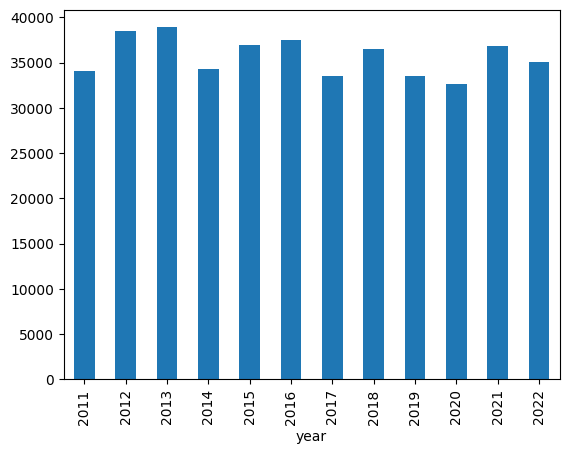

In [12]:
enroll_by_year = data.groupby('year')['enrollment_count'].agg('sum')
enroll_by_year.plot(kind = 'bar' )
plt.show()

In [13]:
enroll_by_year

year
2011    34109
2012    38463
2013    38897
2014    34344
2015    36910
2016    37507
2017    33550
2018    36477
2019    33485
2020    32696
2021    36840
2022    35118
Name: enrollment_count, dtype: int64

According to the distribution chart below, it is easy to see that the enrollment_counts distribution has a right skew. The majority of courses have 240 to 260 enrollments, while a small number of courses have less than 200 enrollments. There is one course that has an enrollment from 200 to 220.

- The average enrollment is ~231, while the max is 267 and the min is 154.

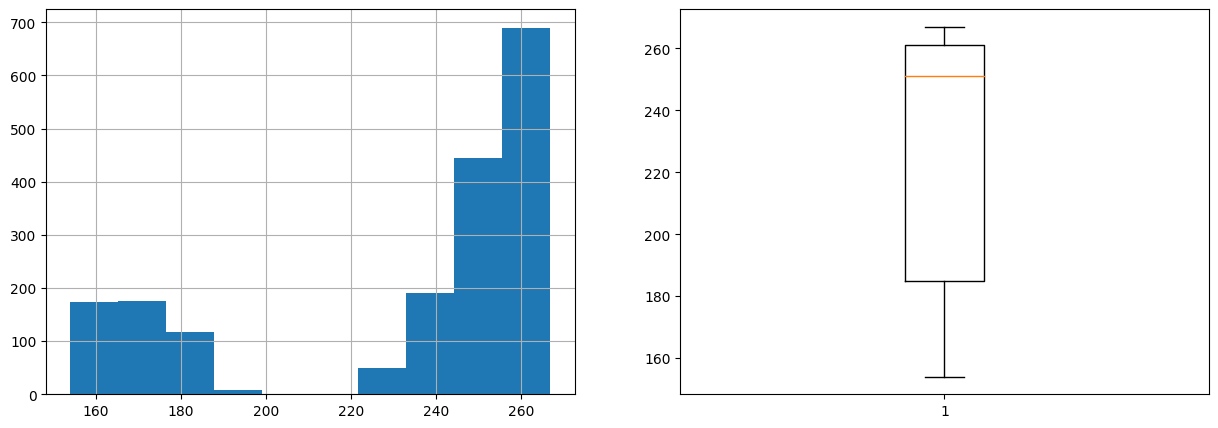

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
data['enrollment_count'].hist(ax = axes[0])
axes[1].boxplot(data['enrollment_count'], notch=0)
plt.show()


In [15]:
data['enrollment_count'].describe()

count    1850.000000
mean      231.565405
std        36.987029
min       154.000000
25%       185.000000
50%       251.000000
75%       261.000000
max       267.000000
Name: enrollment_count, dtype: float64

## Task 3
_Create a visualization that shows how many courses were of each type. Use the
visualization to:_

_a. State which type of course has the most observations_

_b. Explain whether the observations are balanced across the types._

According to the dataset, the online course has the most observations, which take 74% of the total data, while the classroom course only takes part in 25,7%. This distribution makes the data imbalanced since 3/4 of the data is online courses.

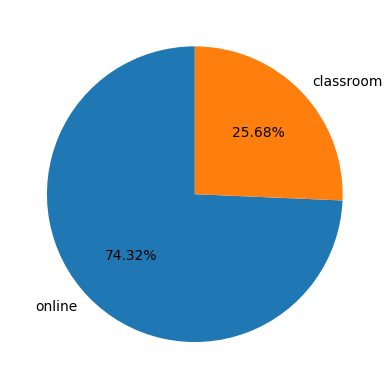

In [16]:
plt.pie(data['course_type'].value_counts(),labels=['online', 'classroom'], startangle=90, autopct='%1.2f%%')
plt.show()

According to the below pie chart, 81% of enrollments are online, while only 18,9% are in class. Besides, the majority of enrollment has None requirement (52%), and 34% of enrollments are Beginner.

In [17]:
data['pre_requirement'].value_counts()

None            891
Beginner        654
Intermediate    305
Name: pre_requirement, dtype: int64

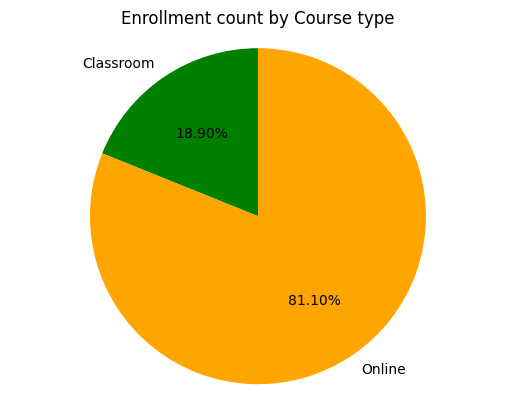

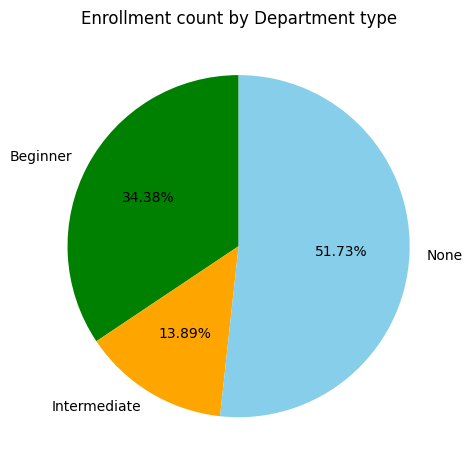

In [18]:
enroll_by_course = data.groupby('course_type')['enrollment_count'].agg('sum')
enroll_by_require = data.groupby('pre_requirement')['enrollment_count'].agg('sum')
labels1= ['Classroom', 'Online']
labels2 = ['Beginner', 'Intermediate', 'None']

colors=['green', 'orange', 'skyblue']
plt.pie(enroll_by_course,labels=labels1, colors=colors, startangle=90, autopct='%1.2f%%')

plt.title('Enrollment count by Course type')

plt.axis('equal')
plt.show()
plt.pie(enroll_by_require,labels=labels2, colors=colors, startangle=90, autopct='%1.2f%%')
plt.title('Enrollment count by Department type')
plt.tight_layout()
plt.show()

In [19]:
enroll_by_require

pre_requirement
Beginner        147283
Intermediate     59483
None            221630
Name: enrollment_count, dtype: int64

In terms of department distribution, it is obvious to spot out that the Technology department has more courses than others, which led them to have more enrollment across the year from 2011 to 2022. On the other hand, the Engineering department has the lowest total of courses and also has the smallest number of enrollments.

In [20]:
data['department'].value_counts()

Technology     719
Science        472
Mathematics    440
Engineering    219
Name: department, dtype: int64

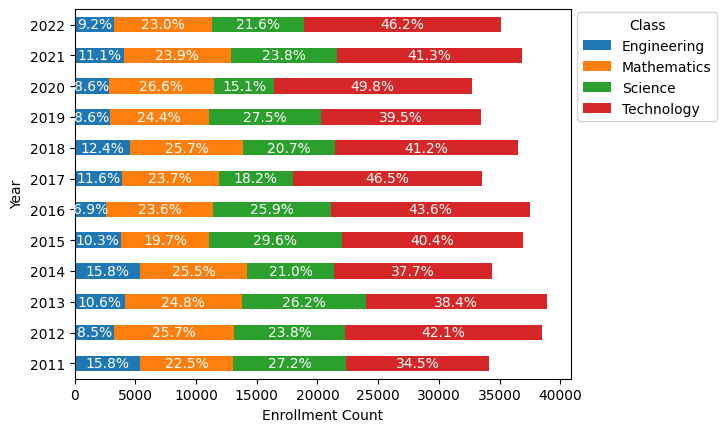

In [21]:
enroll_by_department = data.groupby(['year', 'department'])['enrollment_count'].agg('sum').reset_index()
enroll_by_department.set_index('year')
pivot_enroll = pd.pivot_table(enroll_by_department, values= 'enrollment_count', index= 'year', columns='department', aggfunc= np.sum ).sort_values(by ='year',ascending = True)
total = pivot_enroll.sum(axis=1)
segment_colors = {'Science': 'white', 'Mathematics': 'white', 'Technology' : 'white', 'Engineering': 'white'}
per = pivot_enroll.div(total, axis=0).mul(100).round(1)
ax = pivot_enroll.plot(kind='barh', stacked=True)
plt.xlabel('Enrollment Count')
plt.ylabel('Year')
for c in ax.containers:
    label = c.get_label()
    labels = [f'{row}%' if v.get_height() > 0 else '' for v, row in zip(c, per[(label)])]
    # add the annotation
    ax.bar_label(c, labels=labels, label_type='center', fontweight='normal', color=segment_colors[label])
    
ax.legend(title='Class', bbox_to_anchor=(1, 1.01), loc='upper left')
plt.show()

## Task 4
_Describe the relationship between course type and the enrollment count._

In terms of enrollment counts by course type and department, according to the pie charts below, we can see that the course type distribution by enrollment is different across departments:
- Technology department has the highest number of enrollment, and the majority of enrollments are online (~92%)
- Science department has 71,11% online enrollment, and the Mathematics department has 85% online enrollment.
- While the Engineering department has the lowest number of courses and enrollment, 47% of enrollment is classroom course type, meaning students like to study in the classroom more than other departments.

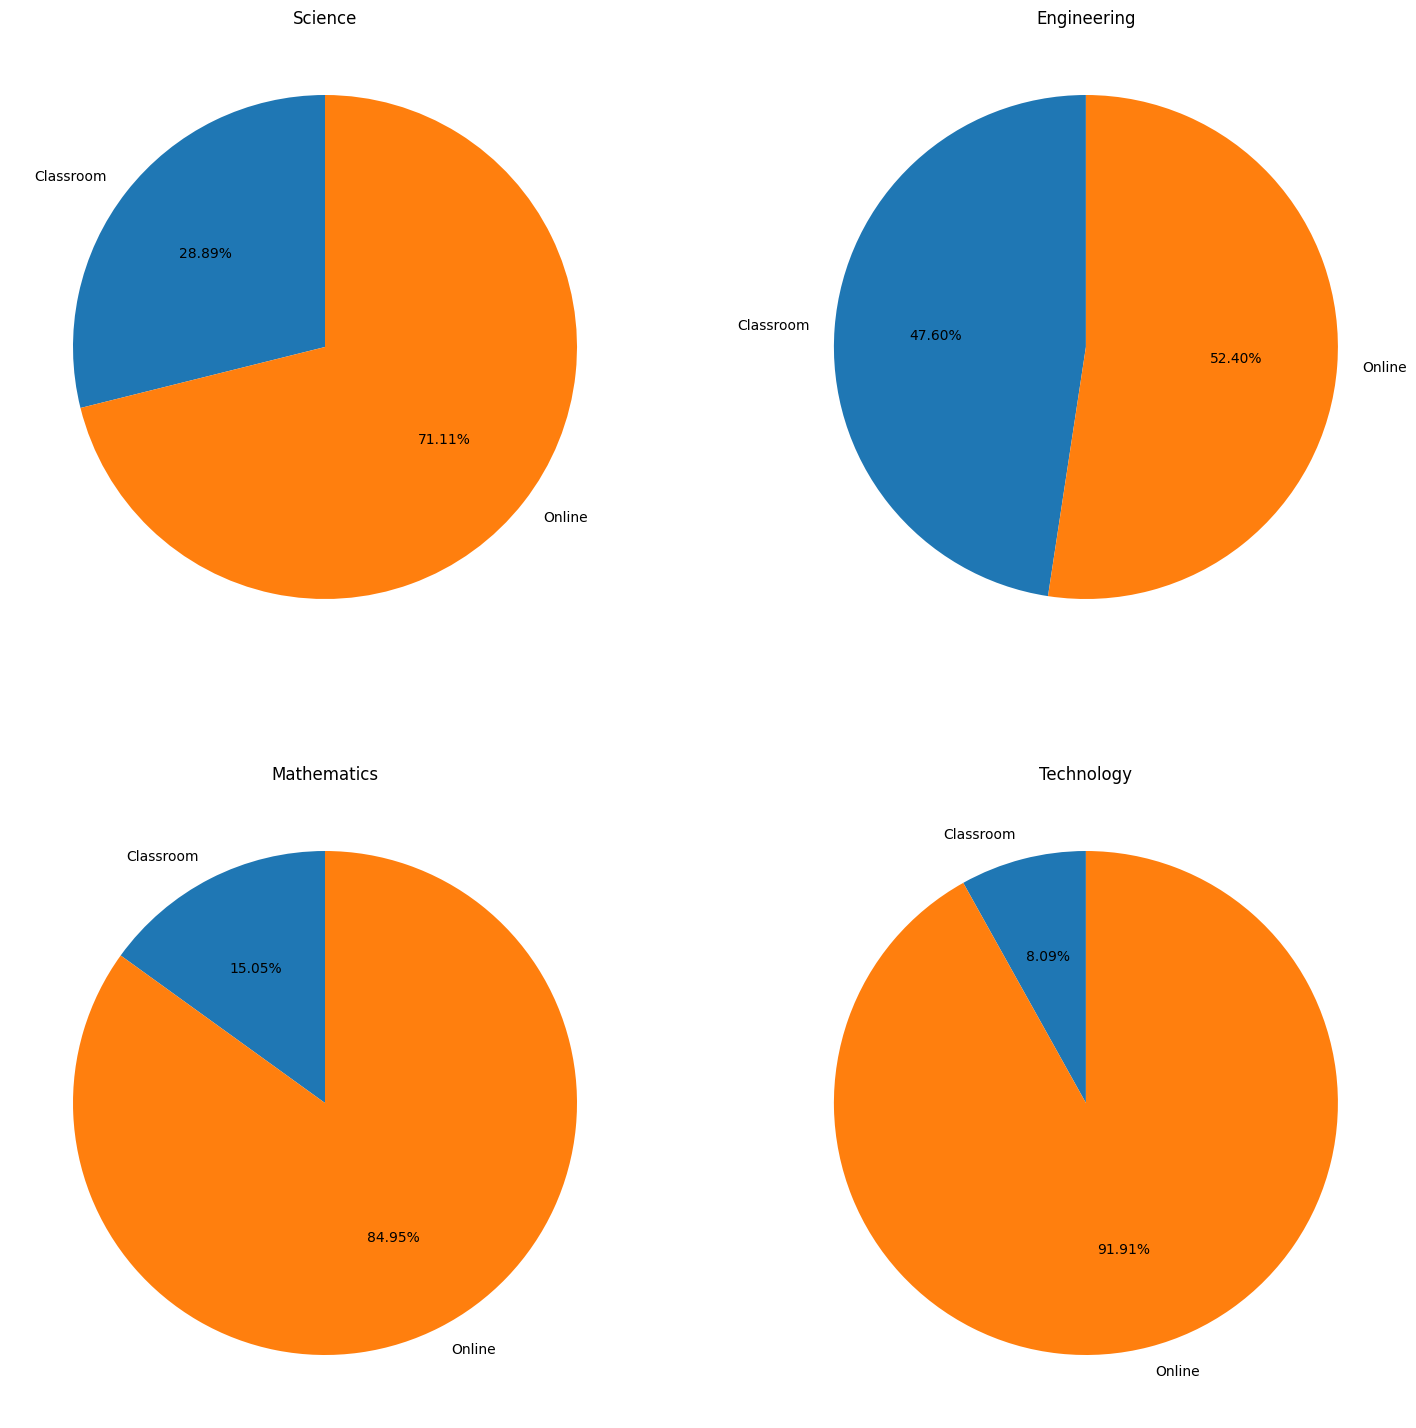

In [22]:
enroll_by_course_department = data.groupby(['course_type', 'department'])['enrollment_count'].agg('sum').reset_index()
enroll_by_course_department_pivot = pd.pivot_table(enroll_by_course_department,values ='enrollment_count', index= 'course_type', columns= 'department' )
fig, axes = plt.subplots(2, 2, figsize=(18, 18))
departments = ['Science', 'Engineering', 'Mathematics', 'Technology']
for department, ax in zip(departments,axes.ravel()):
    course_type_department = enroll_by_course_department_pivot[department]
    ax.pie(course_type_department, labels= labels1, startangle=90, autopct='%1.2f%%')
    ax.set_title(department)
plt.show()

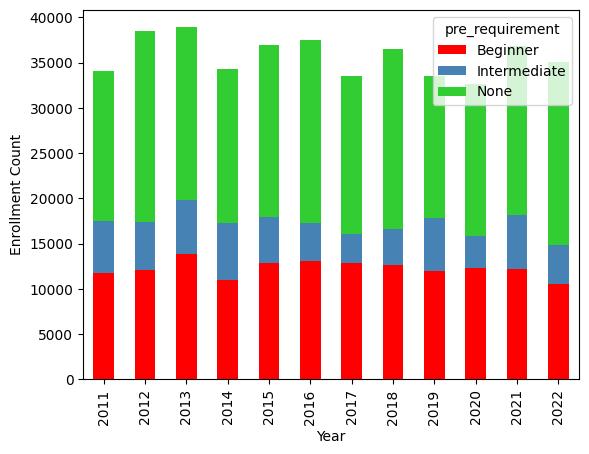

In [23]:
prescore_by_require = data.groupby(['year', 'pre_requirement'])['enrollment_count'].agg('sum').reset_index()
pivot_prescore = pd.pivot_table(prescore_by_require, values = 'enrollment_count', index = 'year', columns= 'pre_requirement', aggfunc=np.sum)
pivot_prescore.plot(kind='bar', stacked=True, color=['red', 'steelblue', 'limegreen'])
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.show()
    

About the **Pre requirement**, while the None and Beginner requirement refer to studying online (91% and 78%), it is clear to notice that 47% of enrollments who has the Intermediate requirement enroll in the offline course.

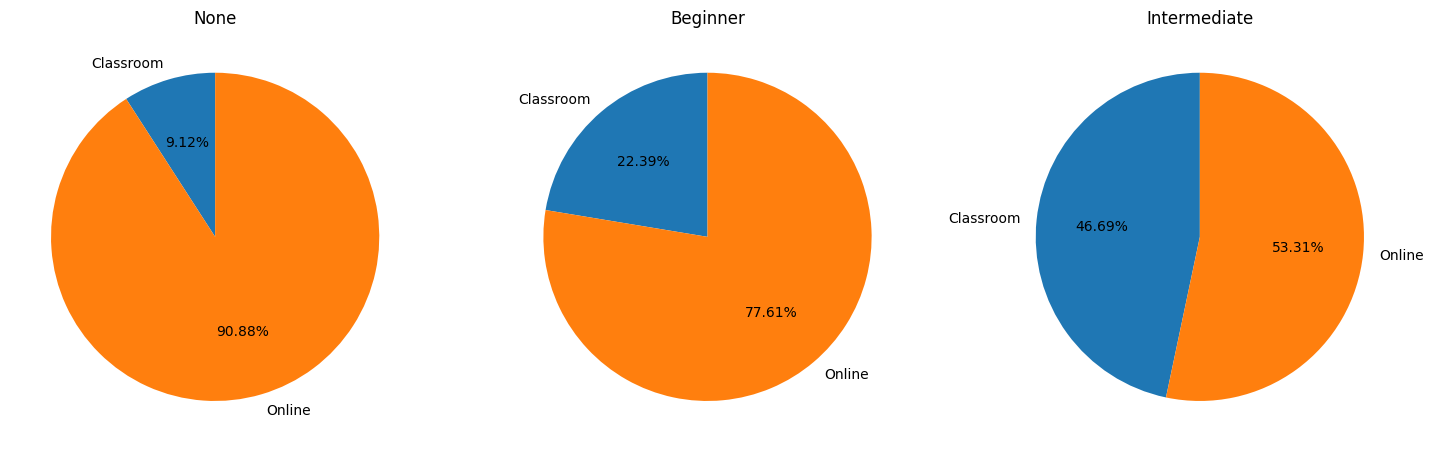

In [24]:
enroll_by_course_requirement = data.groupby(['course_type', 'pre_requirement'])['enrollment_count'].agg('sum').reset_index()
enroll_by_course_requirement_pivot = pd.pivot_table(enroll_by_course_requirement,values ='enrollment_count', index= 'course_type', columns= 'pre_requirement' )
fig, axes = plt.subplots(1, 3, figsize=(18, 20))
requirements = ['None', 'Beginner', 'Intermediate']
for requirement, ax in zip(requirements,axes.ravel()):
    course_type_requirement = enroll_by_course_requirement_pivot[requirement]
    ax.pie(course_type_requirement, labels= labels1, startangle=90, autopct='%1.2f%%')
    ax.set_title(requirement)
plt.show()

## Task 5
The university wants to predict how many students will enroll in a course. State the
type of machine learning problem that this is (regression/ classification/ clustering).

Based on the data provided, it is quite clear to see that Data scientist team should use Regression model to predict the number of students who will enroll in a course.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

In [26]:
#Divide the train set and the test set:
target = 'enrollment_count'
x = data.drop([target, 'course_id'], axis = 1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

x_train

,course_type,year,pre_score,post_score,pre_requirement,department
819,online,2015,22.06,76.0,None,Technology
244,online,2016,80.64,81.0,None,Technology
1101,online,2013,90.11,86.0,Beginner,Mathematics
1265,online,2014,47.07,63.0,None,Mathematics
1244,online,2021,0.00,69.0,Beginner,Technology
...,...,...,...,...,...,...
1130,online,2012,84.58,81.0,None,Science
1294,online,2016,49.65,74.0,None,Technology
860,online,2014,67.91,85.0,None,Technology
1459,online,2011,38.74,86.0,None,Technology


In [27]:
# Standardize data
require_values = ["None", "Beginner", "Intermediate"]
course_values = ["online", "classroom"]

# Use the OneHotEncoder for nominal features and OrdinalEncoder for ordinal features. Note: For course_type, because it only has two values, so I am using OrdinalEncoder will help save more memory, not because this feature has ordinal order.
preprocessor = ColumnTransformer(transformers=[
    ("num_features", StandardScaler(), ["post_score", "pre_score"]),
    ("ordinal_features", OrdinalEncoder(categories=[require_values, course_values]), ["pre_requirement", "course_type"]),
    ("nominal_features", OneHotEncoder(), ['year', 'department'])])


## Task 6:
_Fit a baseline model to predict how many students will enroll using the data provided._

In this task, I've applied the **Random Forest Regression** Model to this data, in order to fit the model and predict the future enrollments for the university.

In [28]:
reg_random = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())])
reg_random.fit(x_train, y_train)
y_predict_random = reg_random.predict(x_test)
for i, j in zip(y_test, y_predict_random):
    print("Actual {}. Predict {}".format(i, j))

Actual 241. Predict 241.0
Actual 180. Predict 180.0
Actual 251. Predict 251.0
Actual 261. Predict 261.0
Actual 256. Predict 256.0
Actual 261. Predict 261.0
Actual 246. Predict 246.94
Actual 241. Predict 241.02
Actual 261. Predict 261.0
Actual 250. Predict 251.0
Actual 261. Predict 261.0
Actual 256. Predict 256.41833333333335
Actual 241. Predict 240.99
Actual 261. Predict 261.0
Actual 261. Predict 261.0
Actual 232. Predict 231.0
Actual 180. Predict 180.0
Actual 170. Predict 170.01
Actual 261. Predict 261.0
Actual 170. Predict 170.53
Actual 236. Predict 236.03
Actual 251. Predict 251.0
Actual 241. Predict 241.05
Actual 241. Predict 241.03
Actual 251. Predict 251.26
Actual 261. Predict 261.0
Actual 241. Predict 241.13
Actual 257. Predict 256.62
Actual 266. Predict 266.01
Actual 185. Predict 185.0
Actual 247. Predict 246.24
Actual 170. Predict 170.0
Actual 251. Predict 251.0
Actual 232. Predict 231.0
Actual 236. Predict 236.2
Actual 261. Predict 261.0
Actual 261. Predict 261.0
Actual 241. 

## Task 7:
_Fit a comparison model to predict how many students will enroll using the data provided._

In terms of comparison, the **Support Vector Machine Regression** model is used, in order to compare the performance with the Random Forest Regression model in task 6.

In [29]:
reg_svm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svm", SVR())])
reg_svm.fit(x_train, y_train)
y_predict_svm = reg_svm.predict(x_test)
for i, j in zip(y_test, y_predict_svm):
    print("Actual {}. Predict {}".format(i, j))


Actual 241. Predict 238.91563747844543
Actual 180. Predict 202.26554168318827
Actual 251. Predict 250.97114448817106
Actual 261. Predict 260.57652287464
Actual 256. Predict 244.60611993961552
Actual 261. Predict 261.08819163378797
Actual 246. Predict 246.15326349790854
Actual 241. Predict 240.91082409121148
Actual 261. Predict 261.15683465354897
Actual 250. Predict 251.02093123571385
Actual 261. Predict 256.01420967075063
Actual 256. Predict 254.83638473217732
Actual 241. Predict 240.48712062660053
Actual 261. Predict 261.38603478331856
Actual 261. Predict 260.80841680403444
Actual 232. Predict 230.2058688594636
Actual 180. Predict 219.99704499711183
Actual 170. Predict 202.66860872430615
Actual 261. Predict 259.83282321642673
Actual 170. Predict 203.96497345205572
Actual 236. Predict 234.8484587209407
Actual 251. Predict 250.88095056409043
Actual 241. Predict 240.85607435970817
Actual 241. Predict 240.6753663350606
Actual 251. Predict 251.03001603350256
Actual 261. Predict 260.9361984

## Task 8
_Explain why you chose the two models used in parts 6 and 7._

The reason why Random Forest Regression and Support Vector Machine Regression is:
- First, this is the regression machine learning problem, which requires a regression model to apply
- Second, because this dataset has numerical, ordinal, and nomimal features, so Random Forest and Support Vector Machine Regression (SVR) models have been used to have the best performance and accurate prediction.

Random forest model operates by constructing a multitude of decision trees at training time and outputting the mean prediction (regression) of the individual trees. Meanwhile, SVR is a very common model that uses the same ideas as the support vector machine for classification, with a few small differences, in order to minimize error, individualizing the hyperplane, which maximizes the margin.

## Task 9
_Compare the performance of the two models used in parts 6 and 7, using any method suitable._

In order to compare the performance of two models, I will calculate the Mean absoluate error, Mean square error and R square score, to evalute the error of prediction:

In [30]:
# Evaluate the Random Forest Regression model performance:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE {}".format(mean_absolute_error(y_test, y_predict_random)))
print("MSE {}".format(mean_squared_error(y_test, y_predict_random)))
print("R2 {}".format(r2_score(y_test, y_predict_random)))

MAE 0.13937387387387323
MSE 0.1232179804804799
R2 0.9999025332119623


In [31]:
# Evaluate the Support Vector Machine model performance:
print("MAE {}".format(mean_absolute_error(y_test, y_predict_svm)))
print("MSE {}".format(mean_squared_error(y_test, y_predict_svm)))
print("R2 {}".format(r2_score(y_test, y_predict_svm)))

MAE 9.591393571682238
MSE 336.76779070253883
R2 0.7336129455592224


## Task 10
_Explain which model performs better and why._

According to the task 9, it is easy to see that Random Forest Regression model have the better performance than Support Vector Machine Regression (SVR).
- When comparing the mean absolute error (MAE), Random Forest Regression model has a lower MAE (only 0.13) while SVR is 9.6
- About the MSE, there is a huge gap between MSE of Random Forest Regression and SVR. It means that SVR has more large error when predictiong the number of enrollment in the test set than Random Forest Regression.
- R square of Random Forest Regression is closer to 1 than SVR => Random Forest Regression fits the features better than SVR model

# Recommendation:

It is clear to see that when the university started offering online courses to reach a wider range of students, it showed the efficiency of the number enrollment of the university.

To help the University predict their enrolment in future courses, we can plan to deploy this Random Forest Regression Model into production. By implementing this model, the predicted number of enrollments only has a mean absolute error of ~ 0.13 with a high accurate rate. I recommend the following steps to ensure the model can be deployed and improved regularly.

Test the model in the recent year and compare its prediction to the estimations of the experienced member on new enrollments.

Identify and fix errors to improve accuracy after testing.

Fully deploy the model using an efficient deployment strategy, such as a web or mobile application or API.

Continuously improve the model by collecting more data, feature engineering, and fine-tuning parameter. 